実装にあたってこちらの記事を参考にさせていただきました  
[Zenn 歩行時の加速度,角速度データから歩行軌跡を描いてみた - Beyond Toyama](https://zenn.dev/happy663/articles/1a0abc285b3a33)

# 事前準備

## ライブラリのインポート

In [19]:
%pip install japanize_matplotlib
%pip install pandas
%pip install scipy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.3 MB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
from io import StringIO

## センサデータの取得

In [28]:
# acc_file_path = "https://raw.githubusercontent.com/kanakanho/kajilab-PDR/main/data/acc.csv"
# gyro_file_path = "https://raw.githubusercontent.com/kanakanho/kajilab-PDR/main/data/gyro.csv"

# # 通信してデータを取得
# df_acc = pd.read_csv(acc_file_path)
# df_gyro = pd.read_csv(gyro_file_path)

data = """time,mac_address,service_uuid,rssi
11:27:11,11-22-33-44-55-66,0d7e93aa-563a-4feb-8635-ed9ed29c6c00,-45
11:27:12,A1-BB-CB-FE-5A-6B,9f8274e5-8772-4f90-b1f1-1355d98d82f6,-34
11:27:12,B1-CC-FF-FA-1A-3B,3cb5a2b2-42fc-42cb-b1c4-2098313537ed,-78
11:27:12,FF-AB-1F-FB-34-54,7cf23107-156a-4127-b618-0ffe56fdee44,-90
11:27:19,11-22-33-44-55-66,0d7e93aa-563a-4feb-8635-ed9ed29c6c00,-47
11:27:20,A1-BB-CB-FE-5A-6B,9f8274e5-8772-4f90-b1f1-1355d98d82f6,-31
11:27:20,B1-CC-FF-FA-1A-3B,3cb5a2b2-42fc-42cb-b1c4-2098313537ed,-67
11:27:46,A1-BB-CB-FE-5A-6B,9f8274e5-8772-4f90-b1f1-1355d98d82f6,-34
11:27:46,B1-CC-FF-FA-1A-3B,3cb5a2b2-42fc-42cb-b1c4-2098313537ed,-81
11:27:56,11-22-33-44-55-66,0d7e93aa-563a-4feb-8635-ed9ed29c6c00,-49
"""

# データをDataFrameとして読み込む
df = pd.read_csv(StringIO(data))

# timeをdatetime型に変換（時間順に並べるため）
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# センサデータの加工

## ウィンドウの宣言

In [26]:
window_acc = 400
window_pre = 240
window_gayo = 200
shift_amount = window_pre * -1

## 生データの描画

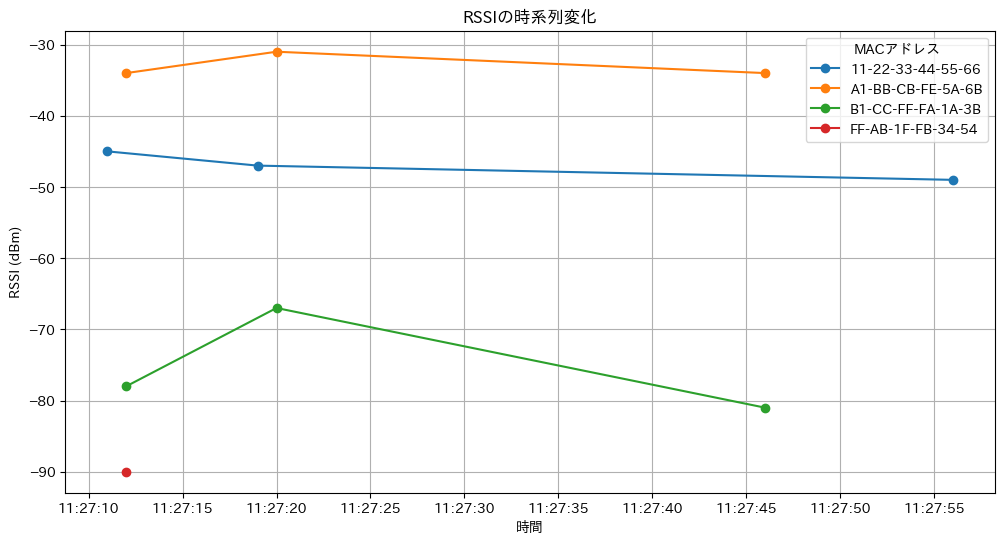

In [29]:
# グラフの描画
plt.figure(figsize=(12, 6))

# MACアドレスごとにグループ化してプロット
for mac, group in df.groupby('mac_address'):
    plt.plot(group['time'], group['rssi'], marker='o', label=mac)

# グラフの装飾
plt.xlabel('時間')
plt.ylabel('RSSI (dBm)')
plt.title('RSSIの時系列変化')
plt.grid(True)
plt.legend(title='MACアドレス')

# 表示
plt.show()

# plt.subplots_adjust(hspace=0.3)
# fig = plt.figure(figsize=(10, 10))

# # 加速度のプロット
# ax1 = fig.add_subplot(2,1,1)
# ax1.title.set_text("加速度")
# ax1.plot(df_acc["t"], df_acc["x"], label="acc_x")
# ax1.plot(df_acc["t"], df_acc["y"], label="acc_y")
# ax1.plot(df_acc["t"], df_acc["z"], label="acc_z")
# ax1.set_xlabel("time")
# ax1.set_ylabel("acceleration [m/s^2]")
# ax1.set_xlim(0, 100)
# ax1.set_ylim(-10, 50)
# ax1.legend()

# # ジャイロのプロット
# ax2 = fig.add_subplot(2,1,2)
# ax2.title.set_text("角度")
# ax2.plot(df_gyro["t"], df_gyro["x"], label="gyro_x")
# ax2.plot(df_gyro["t"], df_gyro["y"], label="gyro_y")
# ax2.plot(df_gyro["t"], df_gyro["z"], label="gyro_z")
# ax2.set_xlabel("time")
# ax2.set_ylabel("angular velocity [rad/s]")
# ax2.set_xlim(0, 100)
# ax2.set_ylim(-10, 50)
# ax2.legend()

# plt.show()